# Model validation currents

Note: this notebook requires the model output data

### IMPORTANT DISCLAIMER:
The model setup provided in this repository is a coarsened and simplified version of an operational model developed by DHI. This simplified model does not resolve the fine-scale processes as seen in the analyses below, and the user of this model should therefore be aware of its limitations. The model setup should only be used for educational purposes and not for decision-making. These model results do not reflect the performance of DHI's operational models.

In [11]:
import modelskill as ms
import matplotlib.pyplot as plt
import helper as h

In [12]:
obs_fldr = "../observations/" 
mr_fldr = "../output/"    
# mr_fldr = "../output_sample/"     # use this if you have not downloaded the full data from Zenodo yet
mr_fn = f"{mr_fldr}Area.dfsu"

In [13]:
# Load observation data
ulist, vlist = h.get_u_v_point_obs()

In [14]:
# Load MIKE21 simulation data
mr_u = ms.DfsuModelResult(mr_fn, name="MIKE21", item=1)
mr_v = ms.DfsuModelResult(mr_fn, name="MIKE21", item=2)
mr_u

<DfsuModelResult>: MIKE21
Time: 2022-01-01 00:00:00 - 2023-12-31 23:00:00
Quantity: u velocity component [m/s]

In [15]:
# u velocities
cmps = []
for o in ulist:
    try:
        cmps.append(ms.match(obs=o, mod=mr_u))
    except Exception as e:
        print(e)
cc_u = ms.ComparerCollection(cmps)

In [16]:
# v velocities
cmps = []
for o in vlist:
    try:
        cmps.append(ms.match(obs=o, mod=mr_v))
    except Exception as e:
        print(e)
cc_v = ms.ComparerCollection(cmps)

## Skill tables

In [17]:
# Print statistics for the u-component
cc_u.skill().round(3)

,n,bias,rmse,urmse,mae,cc,si,r2
observation,,,,,,,,
MO_NN,82544,-0.011,0.104,0.104,0.083,0.966,0.330,0.913
IJmondstroompaal2,98887,0.033,0.106,0.101,0.078,0.794,0.796,0.517


In [18]:
# Print statistics for the v-component
cc_v.skill().round(3)

,n,bias,rmse,urmse,mae,cc,si,r2
observation,,,,,,,,
MO_NN,82544,-0.030,0.083,0.077,0.067,0.491,0.994,0.113
IJmondstroompaal2,98887,-0.029,0.338,0.337,0.295,0.869,0.740,0.572


## Scatter plots

c:\Users\frtp\AppData\Local\miniforge3\envs\WBOresund\Lib\site-packages\modelskill\plotting\_misc.py:83: UserWarning: Showing only 50000 points in plot. Set `show_points` to True to show all points.
  warnings.warn(
c:\Users\frtp\AppData\Local\miniforge3\envs\WBOresund\Lib\site-packages\modelskill\plotting\_misc.py:83: UserWarning: Showing only 50000 points in plot. Set `show_points` to True to show all points.
  warnings.warn(
c:\Users\frtp\AppData\Local\miniforge3\envs\WBOresund\Lib\site-packages\modelskill\plotting\_misc.py:83: UserWarning: Showing only 50000 points in plot. Set `show_points` to True to show all points.
  warnings.warn(
c:\Users\frtp\AppData\Local\miniforge3\envs\WBOresund\Lib\site-packages\modelskill\plotting\_misc.py:83: UserWarning: Showing only 50000 points in plot. Set `show_points` to True to show all points.
  warnings.warn(


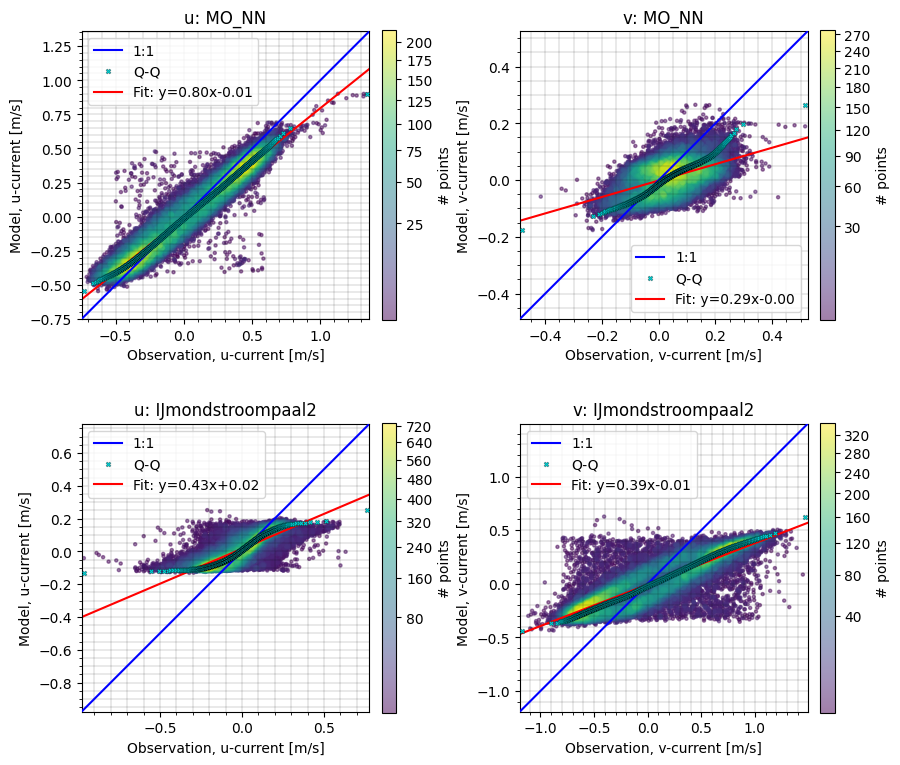

In [19]:
fig, axs = plt.subplots(len(cc_u), 2, figsize=(9,4*len(cc_u)))
axs = axs.flatten()
for i in range(len(cc_u)):
    cc_u[i].sel().plot.scatter(ax=axs[i*2], title=f"u: {cc_u[i].name}")
    cc_v[i].sel().plot.scatter(ax=axs[i*2+1], title=f"v: {cc_v[i].name}")
plt.tight_layout()
plt.show()

# OBS: See disclaimer below plots

### IMPORTANT DISCLAIMER:
The model setup provided in this repository is a coarsened and simplified version of an operational model developed by DHI. This simplified model does not resolve the fine-scale processes as seen in the figure above, and the user of this model should therefore be aware of its limitations. The model setup should only be used for educational purposes and not for decision-making. These model results do not reflect the performance of DHI's operational models.

## Timeseries

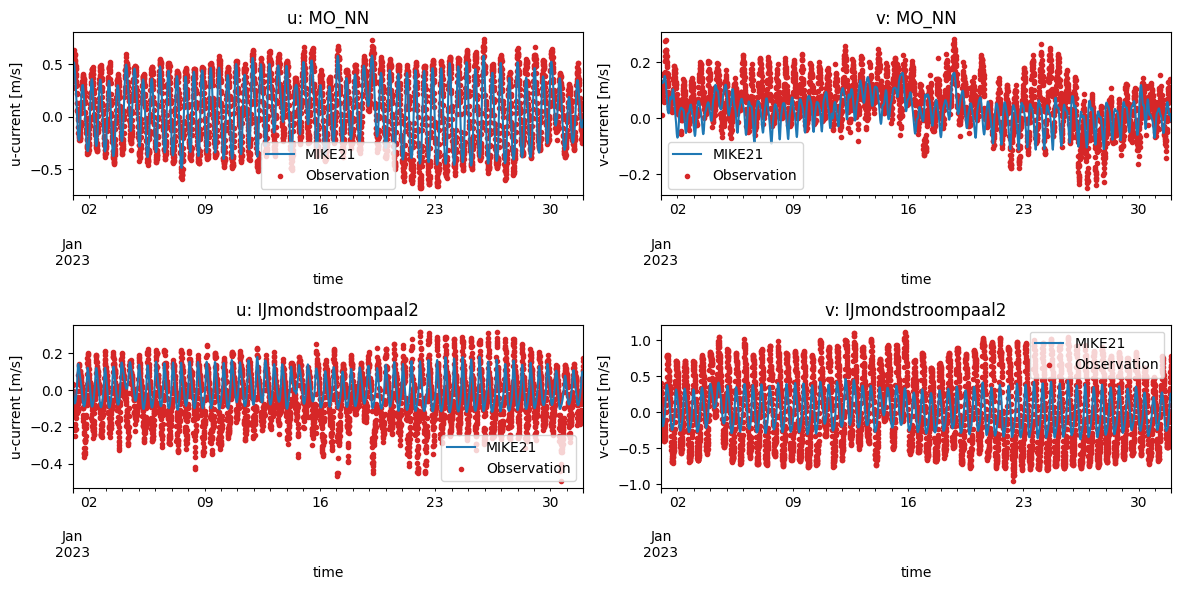

In [20]:
# Look at a timeseries for a qualitative comparison between observations and model
time_slice = slice("2023-01","2023-01")
fig, axs = plt.subplots(len(cc_u), 2, figsize=(12,3*len(cc_u)))
axs = axs.flatten()
for i in range(len(cc_u)):
    cc_u[i].sel(time=time_slice).plot.timeseries(ax=axs[i*2], title=f"u: {cc_u[i].name}")
    cc_v[i].sel(time=time_slice).plot.timeseries(ax=axs[i*2+1], title=f"v: {cc_v[i].name}")
plt.tight_layout()
plt.show()

### IMPORTANT DISCLAIMER:
The model setup provided in this repository is a coarsened and simplified version of an operational model developed by DHI. This simplified model does not resolve the fine-scale processes as seen in the figure above, and the user of this model should therefore be aware of its limitations. The model setup should only be used for educational purposes and not for decision-making. These model results do not reflect the performance of DHI's operational models.